In [1]:
!pip install dask[complete]

     |████████████████████████████████| 665kB 4.7MB/s 
     |████████████████████████████████| 92kB 6.7MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=12f08a589334762a87358217a81b2e2da411011fcdcd224d9be9cef6fcbbd0e8
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=3921e5ac54fcd1748c3164103072a46706f3ce5b00f14de004426588813b9cf8
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built contextvars locket
ERROR: distributed 2.30.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [2]:
!pip install dask-ml

     |████████████████████████████████| 143kB 4.7MB/s 
     |████████████████████████████████| 6.8MB 12.3MB/s 
ERROR: tensorflow-probability 0.11.0 has requirement cloudpickle==1.3, but you'll have cloudpickle 1.6.0 which is incompatible.
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
!pip install pyod

     |████████████████████████████████| 102kB 4.8MB/s 
     |████████████████████████████████| 2.1MB 36.6MB/s 
  Created wheel for pyod: filename=pyod-0.8.3-cp36-none-any.whl size=110349 sha256=ef6515d4f44bd5c655751e076c639e4941d5980af231d85b5df07dc93a17b199
  Stored in directory: /root/.cache/pip/wheels/29/46/95/86facd235cce1d58ae6747ab1aea2b3742564325a66a60863a
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=f38c0eac8183c77ef9361fd2102aca19e466bd8c9b913d2f3e70951f1076c8ea
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167158 sha256=533f3b98c74e035057f017e7bafeac3515490e3d4795b2565cb97b882df267b8
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [4]:
!pip install scikit-plot

Model 1 Angle-based Outlier Detector (ABOD) over 1hour Training:ROC:0.8021, Test Data:ROC:0.8019  
Model 2 Cluster-based Local Outlier Factor (CBLOF) Training:ROC:0.6264, Test: ROC:0.625  
Model 3 Feature Bagging  
Model 4 Histogram-base Outlier Detection (HBOS) 30min Training: ROC:0.8698, Test:ROC:0.8689  
Model 5 Isolation Forest 30min Training :ROC:0.8583, Test:ROC:0.8572  
Model 6 K Nearest Neighbors (KNN) 30min Training :ROC:0.8108, Test : ROC:0.8101  
Model 7 Average KNN  
Model 8 Local Outlier Factor (LOF) 1 hour Training:ROC:0.6162, Test: ROC:0.6098  
Model 9 Minimum Covariance Determinant (MCD)  
Model 10 One-class SVM (OCSVM)  
Model 11 Principal Component Analysis (PCA)  
Model 12 Locally Selective Combination (LSCP)  

In [6]:
import pandas as pd
import numpy as np
from dask import dataframe as dd
import os
import gc
import scipy
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
#from sklearn.model_selection import train_test_split 
from dask_ml.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, roc_auc_score
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 

from pyod.models.knn import KNN 
from pyod.models.ocsvm import OCSVM 
from pyod.models.loda import LODA 
from pyod.models.loci import LOCI 
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
#pyod.models.cof.COF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.copod import COPOD
from pyod.models.xgbod import XGBOD
# Import the utility function for model evaluation
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from pyod.utils.utility import precision_n_scores
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
import scikitplot as skplt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% cd drive/My Drive/FEATURES-2014-2015/

/content/drive/My Drive/FEATURES-2014-2015


In [9]:
dir_path = '/content/drive/My Drive/FEATURES-2014-2015/'
#names_list = sorted(os.listdir(dir_path)[::4])
#parse_dates=['timestamp'],
names_list = sorted(os.listdir(dir_path))
#names_list.remove('.ipynb_checkpoints')
print(names_list)

['.ipynb_checkpoints', 'part-000.csv', 'part-001.csv', 'part-002.csv', 'part-003.csv', 'part-004.csv', 'part-005.csv', 'part-006.csv', 'part-007.csv', 'part-008.csv', 'part-009.csv', 'part-010.csv', 'part-011.csv', 'part-012.csv', 'part-013.csv', 'part-014.csv', 'part-015.csv', 'part-016.csv', 'part-017.csv', 'part-018.csv', 'part-019.csv', 'part-020.csv', 'part-021.csv', 'part-022.csv', 'part-023.csv', 'part-024.csv', 'part-025.csv', 'part-026.csv', 'part-027.csv', 'part-028.csv', 'part-029.csv', 'part-030.csv', 'part-031.csv', 'part-032.csv', 'part-033.csv', 'part-034.csv', 'part-035.csv', 'part-036.csv', 'part-037.csv', 'part-038.csv', 'part-039.csv', 'part-040.csv', 'part-041.csv', 'part-042.csv', 'part-043.csv', 'part-044.csv', 'part-045.csv', 'part-046.csv', 'part-047.csv', 'part-048.csv', 'part-049.csv', 'part-050.csv', 'part-051.csv', 'part-052.csv', 'part-053.csv', 'part-054.csv', 'part-055.csv', 'part-056.csv', 'part-057.csv', 'part-058.csv', 'part-059.csv', 'part-060.csv', '

In [10]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
#To see where the port of the dashboard is, use this command
print(client.scheduler_info()['services'])
# {'dashboard': 8787} --> means you can access it at localhost:8787

{'dashboard': 8787}


In [11]:
names_list_test = names_list[50:150]
names_list_test

['part-049.csv',
 'part-050.csv',
 'part-051.csv',
 'part-052.csv',
 'part-053.csv',
 'part-054.csv',
 'part-055.csv',
 'part-056.csv',
 'part-057.csv',
 'part-058.csv',
 'part-059.csv',
 'part-060.csv',
 'part-061.csv',
 'part-062.csv',
 'part-063.csv',
 'part-064.csv',
 'part-065.csv',
 'part-066.csv',
 'part-067.csv',
 'part-068.csv',
 'part-069.csv',
 'part-070.csv',
 'part-071.csv',
 'part-072.csv',
 'part-073.csv',
 'part-074.csv',
 'part-075.csv',
 'part-076.csv',
 'part-077.csv',
 'part-078.csv',
 'part-079.csv',
 'part-080.csv',
 'part-081.csv',
 'part-082.csv',
 'part-083.csv',
 'part-084.csv',
 'part-085.csv',
 'part-086.csv',
 'part-087.csv',
 'part-088.csv',
 'part-089.csv',
 'part-090.csv',
 'part-091.csv',
 'part-092.csv',
 'part-093.csv',
 'part-094.csv',
 'part-095.csv',
 'part-096.csv',
 'part-097.csv',
 'part-098.csv',
 'part-099.csv',
 'part-100.csv',
 'part-101.csv',
 'part-102.csv',
 'part-103.csv',
 'part-104.csv',
 'part-105.csv',
 'part-106.csv',
 'part-107.csv

In [12]:
#names_list.remove('dask-worker-space')
#names_list_test.remove('.ipynb_checkpoints')
sequencesDask = dd.concat([dd.read_csv(dir_path + name,  parse_dates=['timestamp'], error_bad_lines=False)
                       for name in names_list_test])

In [13]:
sequencesDask[sequencesDask['isAnomaly']==True].count().compute()

host                                                                                                                                                                                                        75041
process                                                                                                                                                                                                     75041
timestamp                                                                                                                                                                                                   75041
isAnomaly                                                                                                                                                                                                   75041
Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDat

In [ ]:
sequencesDask

,host,process,timestamp,isAnomaly,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))",Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used)),"Connection delay : (MXBean(com.bea:Name=source10,Type=JDBCDataSourceRuntime).ConnectionDelayTime)","Stuck threads : (MXBean(com.bea:Name=ThreadPoolRuntime,Type=ThreadPoolRuntime).StuckThreadCount)","Reserve request activity : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ReserveRequestCount))","Stuck threads : (MXBean(com.bea:Name=DataRetirementWorkManager,Type=WorkManagerRuntime).StuckThreadCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source09,Type=JDBCConnectionPoolRuntime).ConnectionsTotalCount))","Connection delay : (MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).ConnectionDelayTime)","Active connections : (MXBean(com.bea:Name=source01,Type=JDBCDataSourceRuntime).ActiveConnectionsCurrentCount)","Memory space activity : (d/dx ((MXBean(java.lang:name=PS Old Gen,type=MemoryPool).Usage.committed / MXBean(java.lang:name=PS Old Gen,type=MemoryPool).Usage.max)))","Active connections : (MXBean(com.bea:Name=source08,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)",Rel. heap committed : ((MXBean(java.lang:type=Memory).HeapMemoryUsage.committed / MXBean(java.lang:type=Memory).HeapMemoryUsage.max)),"Active connections : (MXBean(com.bea:Name=source05,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source01,Type=JDBCConnectionPoolRuntime).ConnectionsTotalCount))",Rel. nonHeap usage : ((MXBean(java.lang:type=Memory).NonHeapMemoryUsage.used / MXBean(java.lang:type=Memory).NonHeapMemoryUsage.max)),"DB connection started : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ConnectionsTotalCount))","Prepared statement cache hit rate : ((MXBean(com.bea:Name=source01,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source01,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Connection delay : (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).ConnectionDelayTime)","Reserve request activity : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).ReserveRequestCount))",Rel. Swap Usage : ((\Swap\used / \Swap\total)),"Stuck threads : (MXBean(com.bea:Name=ClusterMessaging,Type=WorkManagerRuntime).StuckThreadCount)","Failing reserve requests : (incld/dx (MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).FailedReserveRequestCount))","Failing reserve requests : (incld/dx (MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).FailedReserveRequestCount))","Failing reserve requests : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).FailedReserveRequestCount))","Stuck threads : (MXBean(com.bea:ApplicationRuntime=batchModules2,Name=default,Type=WorkManagerRuntime).StuckThreadCount)","Active connections : (MXBean(com.bea:Name=source05,Type=JDBCDataSourceRuntime).ActiveConnectionsCurrentCount)","Reserve request activity : (incld/dx (MXBean(com.bea:Name=source10,Type=JDBCDataSourceRuntime).ReserveRequestCount))","Memory space usage : ((MXBean(java.lang:name=PS Perm Gen,type=MemoryPool).Usage.committed / M

In [ ]:
sequencesDask.describe().compute()

,"Prepared statement cache hit rate : ((MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheHitCount / MXBean(com.bea:Name=source06,Type=JDBCDataSourceRuntime).PrepStmtCacheMissCount))","Memory space usage : ((MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.committed / MXBean(java.lang:name=Code Cache,type=MemoryPool).Usage.max))","Active connections : (MXBean(com.bea:Name=source04,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","Available db connection activity : (d/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).NumAvailable))","Active connections : (MXBean(com.bea:Name=source03,Type=JDBCConnectionPoolRuntime).ActiveConnectionsCurrentCount)","DB connection started : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionsTotalCount))",Heap usage activity : (d/dx (MXBean(java.lang:type=Memory).HeapMemoryUsage.used)),"Connection delay : (MXBean(com.bea:Name=source10,Type=JDBCDataSourceRuntime).ConnectionDelayTime)","Stuck threads : (MXBean(com.bea:Name=ThreadPoolRuntime,Type=ThreadPoolRuntime).StuckThreadCount)","Reserve request activity : (incld/dx (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ReserveRequestCount))",...,"Available db connection activity : (d/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumAvailable))","Available db connection activity : (d/dx (MXBean(com.bea:Name=source10,Type=JDBCConnectionPoolRuntime).NumAvailable))","Rel. unavailable connections : ((MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source04,Type=JDBCDataSourceRuntime).CurrCapacity))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Rel. unavailable connections : ((MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).NumUnavailable / MXBean(com.bea:Name=source08,Type=JDBCDataSourceRuntime).CurrCapacity))","Stuck threads : (MXBean(com.bea:ApplicationRuntime=source05,Name=default,Type=WorkManagerRuntime).StuckThreadCount)",Process CPU : (\Process(java)\CPU),"Successful wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionSuccessTotal))","Failed wait for connection : (incld/dx (MXBean(com.bea:Name=source03,Type=JDBCDataSourceRuntime).WaitingForConnectionFailureTotal))","Connection delay : (MXBean(com.bea:Name=source02,Type=JDBCDataSourceRuntime).ConnectionDelayTime)"
count,122885.000000,122885.000000,122885.0,122885.000000,122885.000000,122885.000000,1.228850e+05,122885.000000,122885.000000,122885.0,...,122885.0,122885.0,122885.0,122885.0,122885.0,122885.0,122885.000000,122885.0,122885.0,122885.000000
mean,0.737173,0.784397,0.0,0.000000,0.028038,0.000016,4.607106e+04,3.055833,0.006795,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.459010,0.0,0.0,83.684542
std,0.448905,0.183438,0.0,0.004034,0.165059,0.004034,2.948940e+08,22.654215,0.082151,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.550262,0.0,0.0,9.061413
min,0.005794,0.292969,0.0,-1.000000,0.000000,0.000000,-5.558077e+09,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,39.000000
25%,1.000000,0.696615,0.0,0.000000,0.000000,0.000000,5.015004e+07,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,80.000000
50%,1.000000,0.868490,0.0,0.000000,0.000000,0.000000,5.959354e+07,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,84.000000
75%,1.123579,0.971354,0.0,0.000000,0.000000,0.000000,6.622876e+07,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.000000,0.0,0.0,90.000000
max,1.381497,0.972656,0.0,1.000000,1.000000,1.000000,3.982861e+09,171.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,788.000000,0.0,0.0,99.000000


In [14]:
labels = sequencesDask['isAnomaly']
sequencesDaskX = sequencesDask.drop(columns=['isAnomaly', 'host', 'process', 'timestamp'])

In [15]:
#split the data into train and test 
X_train, X_test, y_train,y_test = train_test_split(sequencesDaskX.compute(),labels.compute(), test_size = 0.2, random_state=42 )

In [16]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.2
# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]
# Define nine outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state),
    'Feature Bagging':
        FeatureBagging(LOF(n_neighbors=35),
                       contamination=outliers_fraction,
                       random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state),
    'Locally Selective Combination (LSCP)': LSCP(detector_list, contamination=outliers_fraction,random_state=random_state)
}

In [ ]:
clf_COPOD = COPOD()
clf_COPOD.fit(X_train)

# get the prediction on the test data
y_test_pred_COPOD = clf_COPOD.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_COPOD = clf_COPOD.decision_function(X_test)  # outlier scores

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting


In [ ]:
# If you want to see the predictions of the training data, you can use this way:
# get the prediction labels and outlier scores of the training data
y_train_pred_COPOD = clf_COPOD.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores_COPOD = clf_COPOD.decision_scores_  # raw outlier scores

roc_COPOD = roc_auc_score(y_test, y_test_scores_COPOD)
prn_COPOD = precision_n_scores(y_test, y_test_scores_COPOD)

In [ ]:
print(roc_COPOD)
print(prn_COPOD)
print(y_test_scores_COPOD)

In [ ]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print("COPOD", y_train, y_train_scores_COPOD)
print("\nOn Test Data:")
evaluate_print("COPOD", y_test, y_test_scores_COPOD)

In [ ]:
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred_COPOD, normalize=False,title='Consfusion Matrix on Train Set')
plt.show()

In [ ]:
# plot the comfusion matrix in the test set 
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred_COPOD, normalize=False, title="Consfusion Matrix on Test Set")
plt.show()

In [ ]:
outliers_fraction = 0.25
random_state = np.random.RandomState(42)
#clf_MCD = MCD(
       # contamination=outliers_fraction, random_state=random_state)
clf_MCD.fit(X_train)

# get the prediction on the test data
y_test_pred_MCD = clf_MCD.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_MCD = clf_MCD.decision_function(X_test)  # outlier scores

In [ ]:
# If you want to see the predictions of the training data, you can use this way:
# get the prediction labels and outlier scores of the training data
y_train_pred_MCD = clf_MCD.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores_MCD = clf_MCD.decision_scores_  # raw outlier scores

roc_MCD = roc_auc_score(y_test, y_test_scores_MCD)
prn_MCD = precision_n_scores(y_test, y_test_scores_MCD)

In [ ]:
print(roc_MCD)
print(prn_MCD)
print(y_test_scores_MCD)

In [ ]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print("MCD", y_train, y_train_scores_MCD)
print("\nOn Test Data:")
evaluate_print("MCD", y_test, y_test_scores_MCD)

In [ ]:
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred_MCD, normalize=False,title='Consfusion Matrix on Train Set')
plt.show()

In [ ]:
# plot the comfusion matrix in the test set 
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred_MCD, normalize=False, title="Consfusion Matrix on Test Set")
plt.show()

In [17]:
outliers_fraction = 0.25
random_state = np.random.RandomState(42)
clf_CBLOF = CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state)
clf_CBLOF.fit(X_train)

# get the prediction on the test data
y_test_pred_CBLOF = clf_CBLOF.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_CBLOF = clf_CBLOF.decision_function(X_test)  # outlier scores

In [18]:
# If you want to see the predictions of the training data, you can use this way:
# get the prediction labels and outlier scores of the training data
y_train_pred_CBLOF = clf_CBLOF.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores_CBLOF = clf_CBLOF.decision_scores_  # raw outlier scores

roc_CBLOF = roc_auc_score(y_test, y_test_scores_CBLOF)
prn_CBLOF = precision_n_scores(y_test, y_test_scores_CBLOF)

In [19]:
print(roc_CBLOF)
print(prn_CBLOF)
print(y_test_scores_CBLOF)

0.62499264863642
0.058902365476110705
[8.23388208e+11 9.36561871e+11 8.94020101e+11 ... 4.04743114e+12
 1.32688353e+12 2.17282889e+12]


In [20]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print("CBLOF", y_train, y_train_scores_CBLOF)
print("\nOn Test Data:")
evaluate_print("CBLOF", y_test, y_test_scores_CBLOF)


On Training Data:
CBLOF ROC:0.6264, precision @ rank n:0.0601

On Test Data:
CBLOF ROC:0.625, precision @ rank n:0.0589


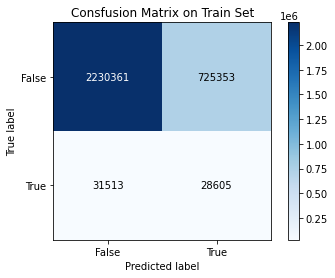

In [21]:
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred_CBLOF, normalize=False,title='Consfusion Matrix on Train Set')
plt.show()

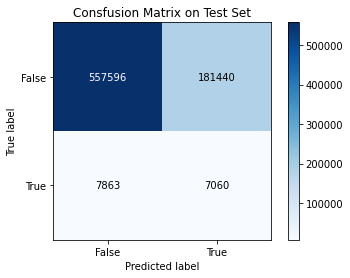

In [22]:
# plot the comfusion matrix in the test set 
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred_CBLOF, normalize=False, title="Consfusion Matrix on Test Set")
plt.show()

In [ ]:
outliers_fraction = 0.25
random_state = np.random.RandomState(42)
clf_LOF = LOF(n_neighbors=35, contamination=outliers_fraction)
clf_LOF.fit(X_train)

# get the prediction on the test data
y_test_pred_LOF = clf_LOF.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_LOF = clf_LOF.decision_function(X_test)  # outlier scores

In [ ]:
# If you want to see the predictions of the training data, you can use this way:
# get the prediction labels and outlier scores of the training data
y_train_pred_LOF = clf_LOF.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores_LOF = clf_LOF.decision_scores_  # raw outlier scores

roc_LOF = roc_auc_score(y_test, y_test_scores_LOF)
prn_LOF = precision_n_scores(y_test, y_test_scores_LOF)

In [ ]:
print(roc_LOF)
print(prn_LOF)
print(y_test_scores_LOF)

0.609751659677583
0.04818066072505529
[1.03365712 1.26413008 1.04258432 ... 1.06961037 1.11306643 1.01289412]


In [ ]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print("LOF", y_train, y_train_scores_LOF)
print("\nOn Test Data:")
evaluate_print("LOF", y_test, y_test_scores_LOF)


On Training Data:
LOF ROC:0.6162, precision @ rank n:0.0478

On Test Data:
LOF ROC:0.6098, precision @ rank n:0.0482


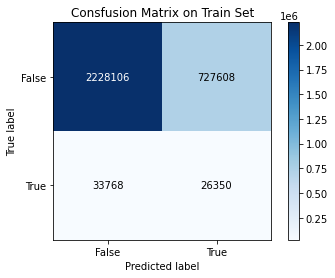

In [ ]:
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred_LOF, normalize=False,title='Consfusion Matrix on Train Set')
plt.show()

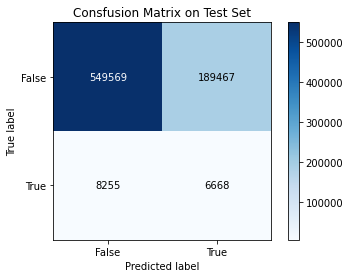

In [ ]:
# plot the comfusion matrix in the test set 
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred_LOF, normalize=False, title="Consfusion Matrix on Test Set")
plt.show()

In [ ]:
outliers_fraction = 0.25
random_state = np.random.RandomState(42)
clf_IForest = IForest(contamination=outliers_fraction,
                                random_state=random_state)
clf_IForest.fit(X_train)

# get the prediction on the test data
y_test_pred_IForest = clf_IForest.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_IForest = clf_IForest.decision_function(X_test)  # outlier scores

In [ ]:
# If you want to see the predictions of the training data, you can use this way:
# get the prediction labels and outlier scores of the training data
y_train_pred_IForest = clf_IForest.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores_IForest = clf_IForest.decision_scores_  # raw outlier scores

roc_IForest = roc_auc_score(y_test, y_test_scores_IForest)
prn_IForest = precision_n_scores(y_test, y_test_scores_IForest)

In [ ]:
print(roc_IForest)
print(prn_IForest)
print(y_test_scores_IForest)

0.857244757378674
0.0036865741671693814
[-0.05404644  0.07206194 -0.05619814 ... -0.0098479  -0.02438653
 -0.03722523]


In [ ]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print("IForest", y_train, y_train_scores_IForest)
print("\nOn Test Data:")
evaluate_print("IForest", y_test, y_test_scores_IForest)


On Training Data:
IForest ROC:0.8583, precision @ rank n:0.0036

On Test Data:
IForest ROC:0.8572, precision @ rank n:0.0037


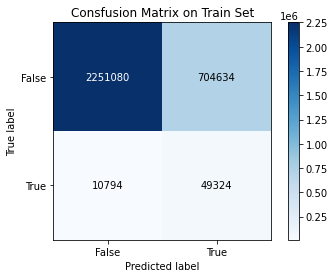

In [ ]:
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred_IForest, normalize=False,title='Consfusion Matrix on Train Set')
plt.show()

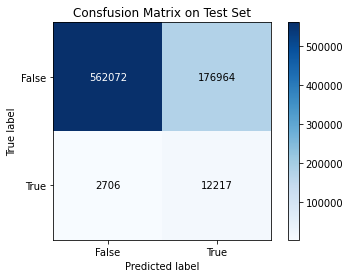

In [ ]:
# plot the comfusion matrix in the test set 
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred_IForest, normalize=False, title="Consfusion Matrix on Test Set")
plt.show()

In [ ]:
clf_loda = LODA()
clf_loda.fit(X_train)

# get the prediction on the test data
y_test_pred_loda = clf_loda.predict(X_test)  # outlier labels (0 or 1)
y_test_scores_loda = clf_loda.decision_function(X_test)  # outlier scores

# If you want to see the predictions of the training data, you can use this way:
# get the prediction labels and outlier scores of the training data
y_train_pred_loda = clf_loda.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores_loda = clf_loda.decision_scores_  # raw outlier scores

roc = roc_auc_score(y_test, y_test_scores_loda)
prn = precision_n_scores(y_test, y_test_scores_loda)

In [ ]:
print(roc)
print(prn)
print(y_test_scores_loda)

0.4533959031214323
0.004087649936339878
[0.05033813 0.04633929 0.04695697 ... 0.04695786 0.04831707 0.04713118]


In [ ]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores_loda)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores_loda)


On Training Data:
KNN ROC:0.4536, precision @ rank n:0.0034

On Test Data:
KNN ROC:0.4534, precision @ rank n:0.0041


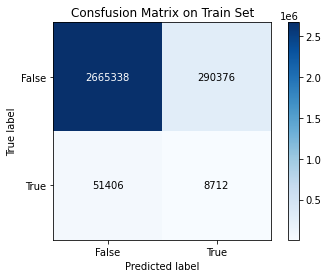

In [ ]:
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred_loda, normalize=False,title='Consfusion Matrix on Train Set')
plt.show()

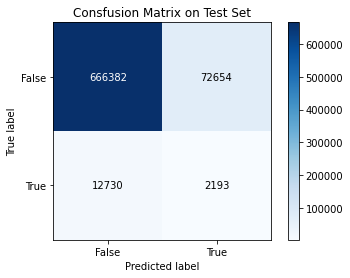

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred_loda, normalize=False, title="Consfusion Matrix on Test Set")
plt.show()

In [ ]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)
# If you want to see the predictions of the training data, you can use this way:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [ ]:
# Evaluate on the training data e
evaluate_print('KNN', y_train, y_train_scores)

KNN ROC:0.8108, precision @ rank n:0.0817


In [ ]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.8108, precision @ rank n:0.0817

On Test Data:
KNN ROC:0.8101, precision @ rank n:0.0805


In [ ]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

ValueError: ignored

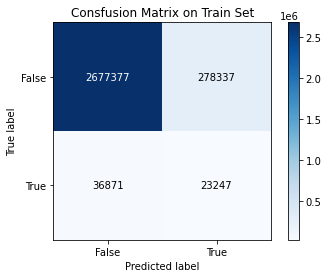

In [ ]:
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False,title='Consfusion Matrix on Train Set')
plt.show()

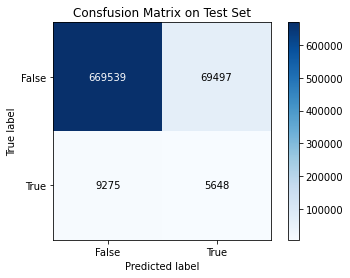

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_test_pred, normalize=False, title="Consfusion Matrix on Test Set")
plt.show()

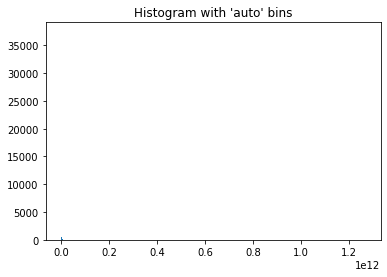

In [ ]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [ ]:
# create the OCSVM model
clf_ocsvm = OCSVM(contamination= 0.172)

clf_ocsvm.fit(X_train)

In [ ]:
# Get the prediction labels of the training data
y_train_pred = clf_ocsvm.labels_  # binary labels (0: inliers, 1: outliers)

clf_name ='OCSVM'

# Outlier scores
y_train_scores = clf_ocsvm.decision_scores_ 
# Evaluate on the training data
evaluate_print(clf_name, y_train, y_train_scores)

OCSVM ROC:0.9651, precision @ rank n:0.7132


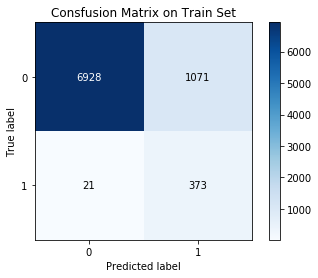

In [ ]:
# plot the comfusion matrix  in the train set 

skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False, title="Consfusion Matrix on Train Set")
plt.show()

In [ ]:
y_test_scores = clf_ocsvm.decision_function(X_test)  # outlier scores

# Evaluate on the training data
evaluate_print(clf_name, y_test,y_test_scores)

OCSVM ROC:0.9571, precision @ rank n:0.6633


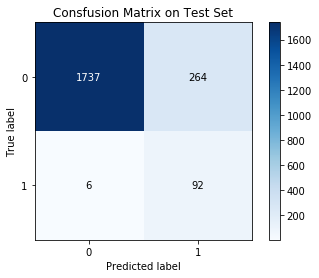

In [ ]:
# plot the comfusion matrix in the test set 
y_preds = clf_ocsvm.predict(X_test) 
skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize=False, title='Consfusion Matrix on Test Set', ) 
plt.show()